# **Проект: Проверка гипотез для увеличения выручки интернет-магазина. A/B-тест**

## Описание проекта. Задачи.

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Задачи:**

**1. Приоритизация гипотез.**

1.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    
1.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    
1.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**2. Анализ A/B-теста.**

2.1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2.2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

2.4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

2.5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

2.6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

2.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

2.8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

2.9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

2.10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

2.11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

2.12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

2.13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

2.14.Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

## Описание данных

**Данные для первой части**

*Файл /datasets/hypothesis.csv.*

**Hypothesis** — краткое описание гипотезы;

**Reach** — охват пользователей по 10-балльной шкале;

**Impact** — влияние на пользователей по 10-балльной шкале;

**Confidence** — уверенность в гипотезе по 10-балльной шкале;

**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

*Файл /datasets/orders.csv.*

**transactionId** — идентификатор заказа;

**visitorId** — идентификатор пользователя, совершившего заказ;

**date** — дата, когда был совершён заказ;

**revenue** — выручка заказа;

**group** — группа A/B-теста, в которую попал заказ.

*Файл /datasets/visitors.csv.*

**date** — дата;

**group** — группа A/B-теста;

**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

## Подготовка к анализу (загрузка, предобработка данных)

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import scipy.stats as stats
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters

In [2]:
#Загрузим файлы:

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#Установим параметры отображения столбцов:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#Посмотрим на данные
display(hypothesis)
display(orders)
visitors

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Заодно проверим не пропущены ли значения в данных

In [3]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Данные нужного типа и отсутствуют пропуски.

Проверим на дубликаты:

In [4]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
visitors.duplicated().sum()

0
0


0

Явные дубликаты отсутствуют.

**Предобработка данных:**

In [5]:
#Приведем date к нужному типу
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')


#Приведем название колонок к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

#Приведем названия столбцов к змеиному стилю
orders.columns = orders.columns.str.replace('id', '_id')

In [6]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


**Посмотрим есть ли пользователи которые попали в обе группы исследования:**

In [7]:
users = orders.groupby('visitor_id')['group'].nunique().reset_index().sort_values('group', ascending=False)
users.query('group == 2').sort_values(by='visitor_id').count()

visitor_id    58
group         58
dtype: int64

58 человек попали в обе группы исследования их можно удалить

In [8]:
orders_filtered = orders.groupby(['visitor_id', 'group', 'date', 'transaction_id'], as_index=False)['revenue'].sum()
orders_filtered=orders_filtered.drop_duplicates(subset='visitor_id',keep=False).reset_index()

orders = orders_filtered

**Выводы по разделу:**

На данном этапе была проделана следующая работа:
1. Осуществлена проврека на явные дубликаты.
2. Данные приведены к нужному типу.
3. Заменены названия столбцов.
4. Удалены пользователи попавшие в обе группы исследования.

## Приоритизация гипотез.

**1.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

ICE расчитывается по следюущей формуле: **ICE = Impact x Confidence / Efforts**

Для анализа подойдут данные из таблицы hypothesis:

In [9]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis = hypothesis.sort_values(by='ice', ascending=False)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Согласно показателю приоретизации ICE на первом месте гипотеза 8, а на последнем гипотеза 4.

**1.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

RICE расчитывается по следюущей формуле: **RICE = (Reach x Impact x Confidence) / Efforts**

Для анализа подойдут данные из таблицы hypothesis:

In [10]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis = hypothesis.sort_values(by='rice', ascending=False)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Согласно показателю RICE на первом месте уже гипотеза 7, а на последнем также гипотеза 4.

**1.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

Распределение мест в методиках ICE и RICE различны. В отличии от ICE показатель RICE учитывает охваты, что влияет на приоритизацию.

Места по показателю ICE:

1. 8 гипотеза
2. 0 гипотеза
3. 7 гипотеза

Места по показателю RICE:
1. 7 гипотеза
2. 2 гипотеза
3. 0 гипотеза

На последнем месте в обоих случаях Гипотез 4.

Исходя из распределения места можно сделать вывод что наиболее приоритетные Гипотезы 0 и 7 так как они вошли в ТОП-3 и в ICE, и в RICE.

## Анализ A/B-теста

**5.1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

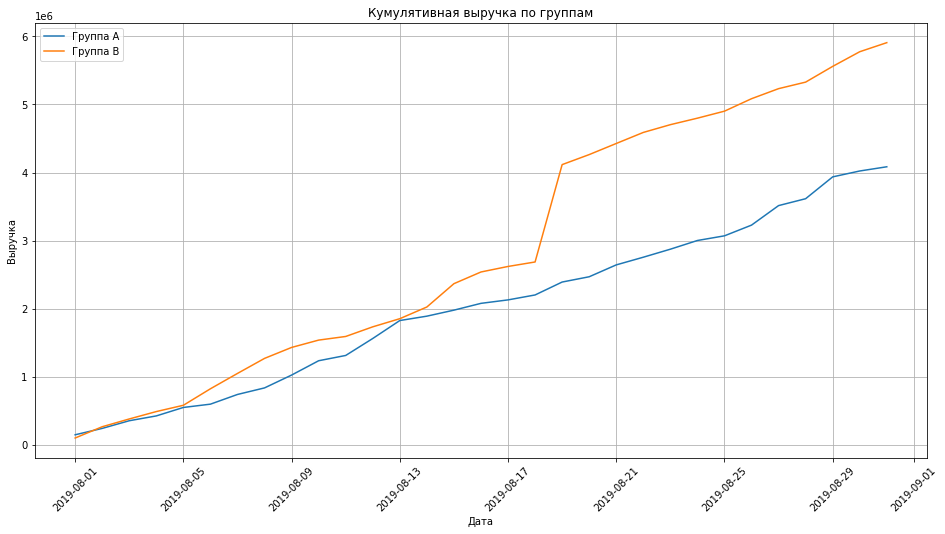

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),
                                       axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(16, 8))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()

# Отображаем график
plt.show()

**Вывод:** На протяжении 5 дней выручка была примерно одинаковой однако на 5 день группа B резко вырвалась вперед и преимущество сохранилось

**Предположение:** Возможно это связно с появлением аномально больших заказов.

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Верно, но пока мы не знаем, с чем связан скачок в группе B: с резким увеличением количества заказов или с ростом стоимости.
</div>

**5.2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

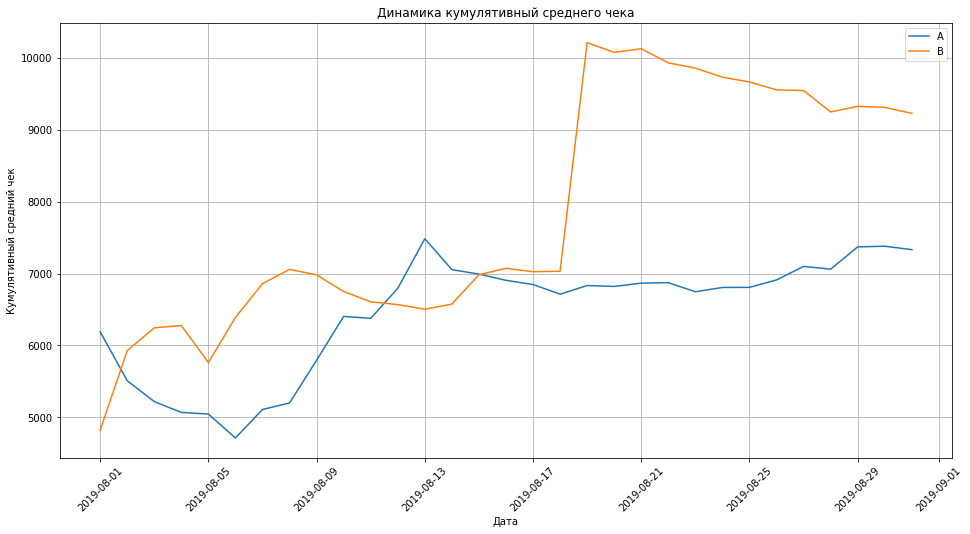

In [12]:
plt.figure(figsize=(16, 8))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Динамика кумулятивный среднего чека')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()

# Отображаем график
plt.show()

**Вывод:** В первые 5 дней средний чек по группе В превышел примерно на тысячу после чего резко вырвался вперед.

**Предположение:** Как и с выручкой это скорей всего связано в аномально дорогими товарами.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Да, крупные заказы могли стать причиной резкого роста.
</div>

**2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

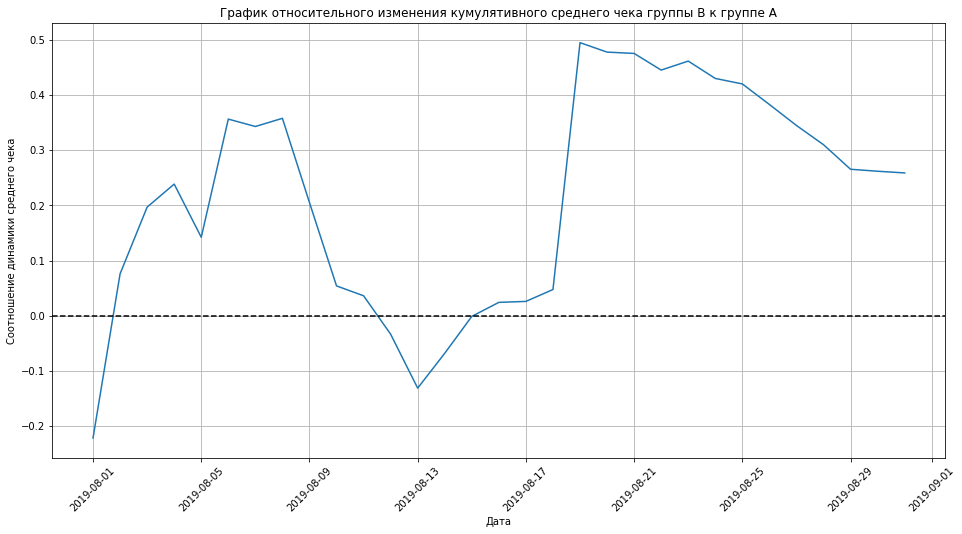

In [13]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 8))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Соотношение динамики среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.xticks(rotation=45)

# Отображаем график
plt.show()

**Вывод:** Данный график практически совпадает с предыдущими, что свидетельствует о более высокой стоимости товаров Группы В. В моменте средний чек группы В был выше больше чем на 50%. После чего зафиксировался в районе 25%.

**2.4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

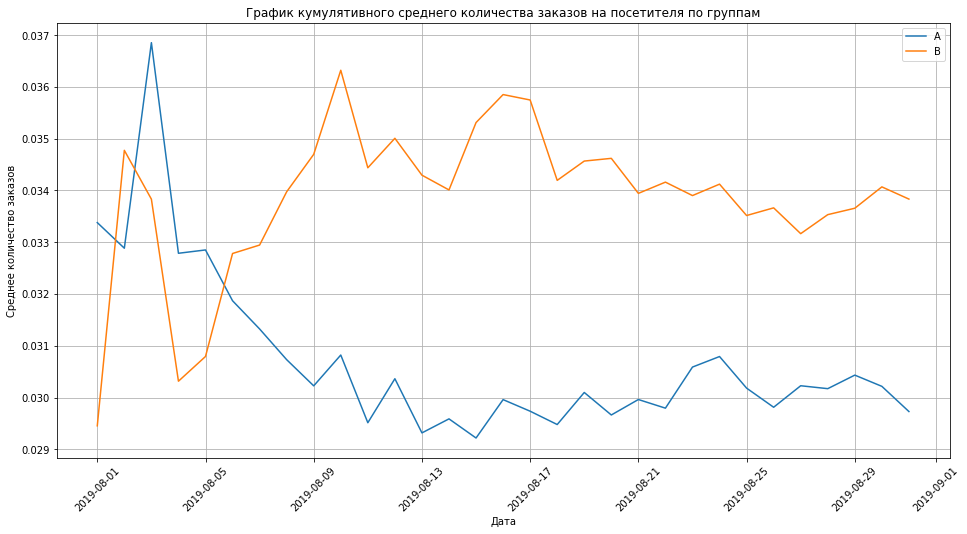

In [14]:
plt.figure(figsize=(16, 8))

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
# Отображаем график
plt.show()

**Вывод:** В начале периода больше было заказов было в Группе А. После чего группа В вышла вперед и среднее количество заказов стабилизировалось. 

**2.5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

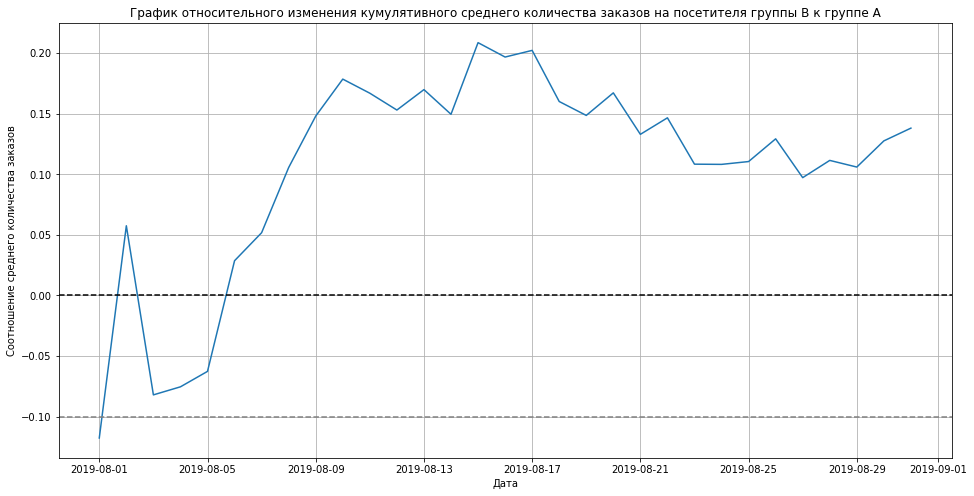

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Соотношение среднего количества заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.grid(True)

**Вывод:** Диаграмма подтверждает результаты предыдущего графика в начале группа В была ниже после чего закрепилась выше Группы А примерно на 20%.

**2.6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

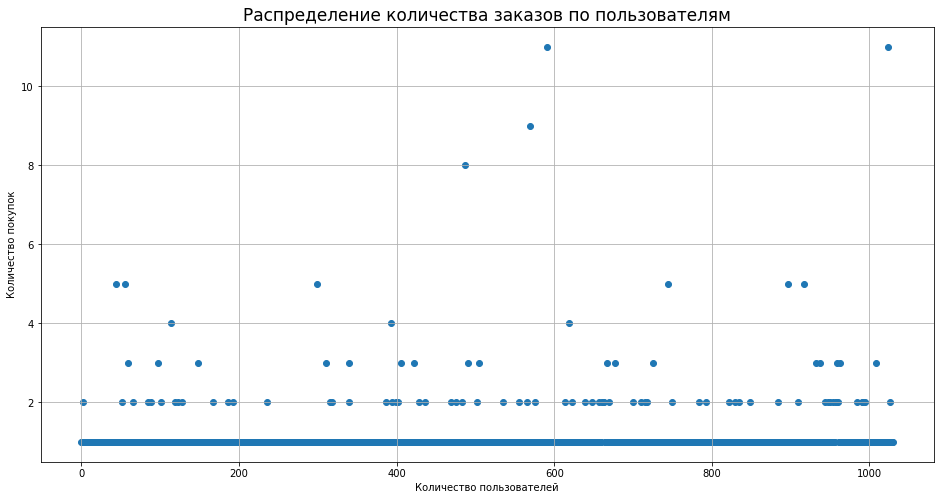

In [16]:
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
ordersByUsers.columns =  ['user_id', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(16, 8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение количества заказов по пользователям', fontsize=17)
plt.ylabel('Количество покупок')
plt.xlabel('Количество пользователей')
plt.grid(True)
plt.show()

**Вывод:** Исходя из распределения можно сделать вывод что заказы больше одного это скорее аномалия нежели чем нет.

**2.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [17]:
orders_amount = np.percentile(ordersByUsers['orders'], [90, 95, 99])
orders_amount

array([1., 2., 4.])

Исходя из перцентиля можно сделать вывод что лишь 5% совершают более двух покупок и 1% более трех покупок.

**2.8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

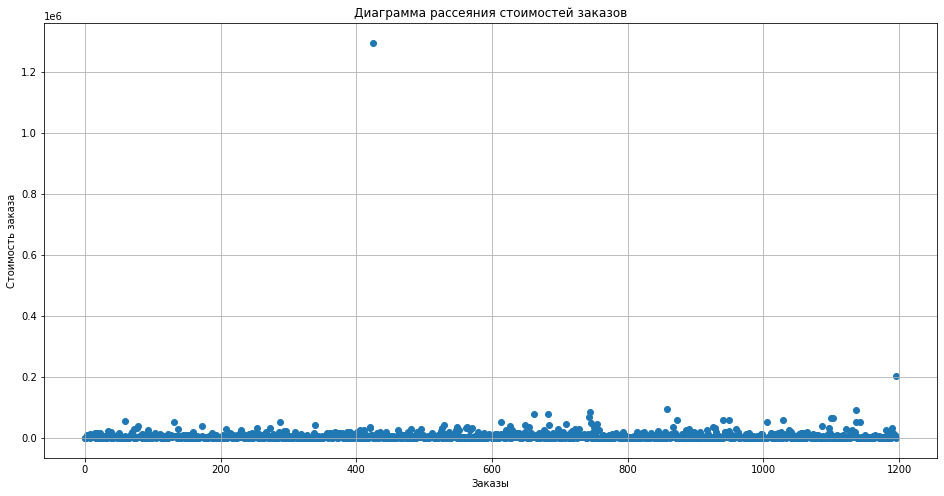

In [18]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(16, 8))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.title('Диаграмма рассеяния стоимостей заказов')
plt.grid(True)
plt.show()

На графике видно что есть два заказа сильно выбивающиеся из общего списка. Уберем их для того чтобы посмотреть распределение.

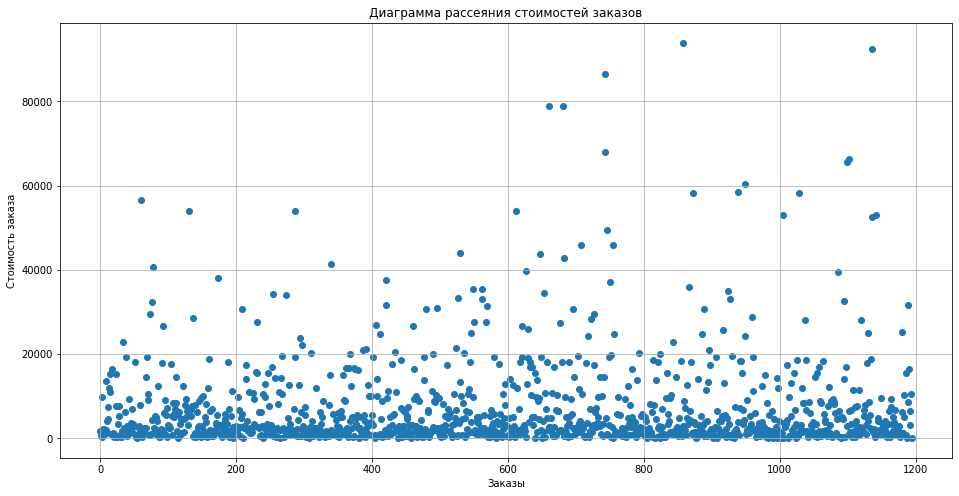

In [19]:
orders_without_anomaly = orders.query('revenue < 200000')

x_values = pd.Series(range(0, len(orders_without_anomaly)))
plt.figure(figsize=(16, 8))
plt.scatter(x_values, orders_without_anomaly['revenue'])
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.title('Диаграмма рассеяния стоимостей заказов')
plt.grid(True)
plt.show()

In [20]:
orders_without_anomaly.describe()

,transaction_id,visitor_id,revenue
count,1.195000e+03,1.195000e+03,1195.000000
mean,2.155441e+09,2.166214e+09,7109.056904
std,1.228198e+09,1.237027e+09,10950.645888
min,1.062393e+06,5.114589e+06,50.000000
25%,1.167230e+09,1.111185e+09,1220.000000
50%,2.145194e+09,2.219162e+09,2970.000000
75%,3.235076e+09,3.177698e+09,8265.000000
max,4.293856e+09,4.283872e+09,93940.000000


В среднем заказы составляют 8000 рублей, а заказы дороже 20000 скорее аномалия.

**2.9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [1]:
orders_price = np.percentile(orders['revenue'], [95, 99])

NameError: name 'np' is not defined

Перцентили доказывают вывод сделанный выше стоимость заказа дороже **28000** редкость и составляет 5% случаев, а дороже **58233.2** всего лишь 1%

**2.10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

In [22]:
# подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [23]:
ordersByUsersA = (
    orders[orders['group']=='A']
    .groupby(by='visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
ordersByUsersB = (orders[orders['group']=='B']
                  .groupby(by='visitor_id', as_index=False)
                  .agg({'transaction_id':pd.Series.nunique}))
ordersByUsersA.columns = ['user_id', 'orders']
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], 
                    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])), 
                              name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], 
                    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()-len(ordersByUsersB['orders'])),
                              name='orders')], axis=0)

Сформируем нулевую и альтернативную гипотезы:

**H₀ - статистически значимых различий в среднем количестве заказов между группами нет**

**H₁ - статистически значимые различи в среднем количестве заказов между группами есть**

In [24]:
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная разница между средним количество заказов группы B от группы A: {0:.2%}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.01679
Относительная разница между средним количество заказов группы B от группы A: 13.81%


**Вывод:** Среднее количество заказов группы B на 13.81% больше чем в группе А. Показатель p-value 0.01679 на уровне значимости 0.05 является статистически значимым(0.01679 > 0.05) . Поэтому нулевую гипотезу можно отвергнуть.

**2.11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Сформируем нулевую и альтернативную гипотезы:

**H₀ - статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным нет**

**H₁ - статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным есть**

In [25]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print("Относительный разница между средним количество заказов группы B к группе A: {0:.2%}".format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительный разница между средним количество заказов группы B к группе A: 25.87%


**Вывод:** Средний чек Группы В на четверть выше чем в Группе А (**25.87%**). Однако p-value: **0.729 > 0.05**. Что подтверждает ранее сделанной вывод о том что скорей всего это аномальные заказы.  Значение p-value не является статистически значимым нулевую гипотезу не отвергаем.

**2.12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [26]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_amount[0]]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_amount[0]]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders_price[0]]['visitor_id']

# Объединим аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'], pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        )
    ],
    axis=0
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'], pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        )
    ],
    axis=0
)

Сформируем нулевую и альтернативную гипотезы:

**H₀ - статистической значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет**

**H₁ - статистической значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным есть**

In [28]:
print('p-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница среднего количества заказов B к A:',
      '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.016
Относительная разница среднего количества заказов B к A: 0.168


**Вывод:** Относительная разница среднего количества заказов B к A: **16.8%**. p-value 0.016 < 0.05 поэтому отвергаем нулевую гипотезу.

**2.13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

Сформируем нулевую и альтернативную гипотезы:

**H₀ - статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным нет**

**H₁ - статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным есть**

In [29]:
print('p-value:'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Разница среднего чека B к А'

    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:0.835
Разница среднего чека B к А-0.006


**Вывод:** Средний чек в Группе А незначительно выше чем в Группе В. на **0.6%** P-value 0.835, что свидетельствует об отсутствии статистически значимых различий. Значение p-value > 0.05 свидетельствует о том, что статистически значимых различий нет, поэтому нулевую гипотезу не отвергаем.

**2.14.Примите решение по результатам теста и объясните его. Варианты решений:**

- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Результаты анализа A/B теста показали, что внесение изменений и отказ от варианта A в пользу B следует рассмотреть, поскольку это привело к положительному влиянию на среднее количество заказов с ростом на 16.8%. Это изменение с высокой вероятностью приведет к увеличению общей выручки, особенно учитывая отсутствие значимой разницы в среднем чеке между группами. Продолжение тестирования не представляется целесообразным.

## Выводы:

**Выводы по приоритизации гипотез:**

Распределение мест в методиках ICE и RICE различны. В отличии от ICE показатель RICE учитывает охваты, что влияет на приоритизацию.

Места по показателю ICE:

1. 8 гипотеза
2. 0 гипотеза
3. 7 гипотеза

Места по показателю RICE:
1. 7 гипотеза
2. 2 гипотеза
3. 0 гипотеза

На последнем месте в обоих случаях Гипотез 4.

Исходя из распределения места можно сделать вывод что наиболее приоритетные Гипотезы 0 и 7 так как они вошли в ТОП-3 и в ICE, и в RICE.

**Выводы по анализу A/B-теста:**

- По "сырым данным" Среднее количество заказов группы B на **13.81%** больше чем в группе А.
- По "сырым данным" средний чек Группы В на четверть выше чем в Группе А (**25.87%**)
- Средний чек в очищенных данных по Группе А незначительно выше чем в Группе В. на **0.6%** P-value 0.835, что свидетельствует об отсутствии статистически значимых различий.
- Относительная разница среднего количества заказов B к A по очищенным данным: **16.8%**. p-value 0.016 < 0.05 поэтому отвергаем нулевую гипотезу.



Различий в среднем чеке нет, но статистически значимые различия конверсии, как по "сырым", так и по "очищенным" данным в пользу группы "В".

Относительный прирост конверсии группы B = 15.98%
Относительный прирост различий в среднем чеке группы B = 28.66%
Относительный прирост конверсии по "очищенным" данным группы B = 17.39%